<a href="https://colab.research.google.com/github/pbhuch/GL_DecA_G4_NLP1/blob/NLP1_PB/GL_DecA_G4_NLP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Great Learning : AIML Online Capstone -AUTOMATIC TICKET ASSIGNMENT

DecA : Group 4: NLP 1

Group Members :
1. Priya Moily
2. Priyanka Gupta
3. Avinash Balani
4. Priyank Bhuch

Importing relavant Libraries

In [1]:
!pip install ftfy

     |████████████████████████████████| 64 kB 3.0 MB/s 
  Created wheel for ftfy: filename=ftfy-6.0.3-py3-none-any.whl size=41933 sha256=1e518e54911da7dec7425951574d3102260329d34a8ead5f013ea3cffb11a698
  Stored in directory: /root/.cache/pip/wheels/19/f5/38/273eb3b5e76dfd850619312f693716ac4518b498f5ffb6f56d
Successfully built ftfy


In [2]:
#importing libraries
from time import time
from PIL import Image
from zipfile import ZipFile
import os, sys, itertools, re
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import plotly as py
import plotly.graph_objs as go
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot, plot
from sklearn.preprocessing import QuantileTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix, classification_report
import sklearn.neighbors._base
#import sys
#sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base
import imblearn
from imblearn.over_sampling import SMOTE

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.initializers import Constant
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization, Activation, Conv2D, MaxPooling2D, Reshape, Embedding, LSTM,  TimeDistributed, Bidirectional, Lambda, Input, Add, GlobalMaxPool1D
from tensorflow.keras import regularizers, optimizers
from sklearn.metrics import r2_score
from tensorflow.keras.models import load_model
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
#import cv2
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# to define loss
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.backend import log, epsilon

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.datasets import imdb

from itertools import islice

import re
import nltk
from nltk.corpus import stopwords

from ftfy import fix_encoding, fix_text, badness
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from sklearn.utils import resample

import pickle, string

import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

import plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

import spacy

# Suppress warnings
import warnings; warnings.filterwarnings('ignore')

SEED = 123                 # to be able to rerun the same NN
np.random.seed(SEED)
tf.random.set_seed(SEED)

from IPython.display import display
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [ ]:
dataset = pd.read_csv("/content/dataset1_mojibake_treated.csv", encoding = 'utf-8')

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8417 entries, 0 to 8416
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Short description            8409 non-null   object
 1   Description                  8416 non-null   object
 2   Caller                       8417 non-null   object
 3   Assignment group             8417 non-null   object
 4   combined_description_caller  8417 non-null   object
 5   combined_description         8417 non-null   object
dtypes: object(6)
memory usage: 394.7+ KB


In [ ]:
pip install langdetect


     |████████████████████████████████| 981 kB 5.3 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=bda496d9cd6a6c76ee871bef0c8ecede06764548685e84046a4c39d3b3b55130
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect


In [ ]:
from langdetect import detect

In [ ]:
def fn_lan_detect(df):                                        
   try:                                                          
      return detect(df)                                      
   except:                                                       
      return 'no'

In [ ]:
dataset['Language'] = dataset['combined_description'].apply(fn_lan_detect)

In [ ]:
dataset.head()

,Short description,Description,Caller,Assignment group,combined_description_caller,combined_description,Language
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,login issue -verified user details.(employee# ...,login issue -verified user details.(employee# ...,en
1,outlook,\n\nreceived from: hmjdrvpb.komuaywn@gmail.com...,hmjdrvpb komuaywn,GRP_0,outlook received from: hmjdrvpb.komuaywn@gmail...,outlook received from: hmjdrvpb.komuaywn@gmail...,en
2,cant log in to vpn,\n\nreceived from: eylqgodm.ybqkwiam@gmail.com...,eylqgodm ybqkwiam,GRP_0,cant log in to vpn received from: eylqgodm.ybq...,cant log in to vpn received from: eylqgodm.ybq...,en
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr_tool page unable to access...,unable to access hr_tool page unable to access...,en
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error skype error owlgqjme qhcozdfx,skype error skype error,no


In [ ]:
# Define regex patterns
#EMAIL_PATTERN = r"([\w.+-]+@[a-z\d-]+\.[a-z\d.-]+)"
EMAIL_PATTERN = r'\S*@\S*\s?'
PUNCT_PATTERN = r"[,|@|\|?|\\|$&*|%|\r|\n|.:|\s+|/|//|\\|/|\||-|<|>|;|(|)|=|+|#|-|\"|[-\]]|{|}]"
# Negative Lookbehind for EmailId replacement- Don't match any number which follows the text "RetainedEmailId"
NUMER_PATTERN = r"(?<!RetainedEmailId)(\d+(?:\.\d+)?)"

# Define a function to treat the texts
def cleanseText(text):
    # Make the text unicase (lower) 
    text = str(text).lower()
    # Remove email adresses
    # text = re.sub(EMAIL_PATTERN, '', text, flags=re.IGNORECASE)
    # Save Email addresses and replace them with custom keyword
    email_dict = extract_email(text)
    for key in email_dict.keys():
        text = text.replace(email_dict[key], key)
    # Remove all numbers 
    text = re.sub(NUMER_PATTERN, '', text)
    # Replace all punctuations with blank space
    # text = re.sub(PUNCT_PATTERN, " ", text, flags=re.MULTILINE)
    text = text.translate(str.maketrans("","", string.punctuation))
    text = re.sub(r'\s+', ' ', text)
    # Replace multiple spaces from prev step to single
    text = re.sub(r' {2,}', " ", text, flags=re.MULTILINE)
    text = text.replace('`',"'")
    # Replace the email ids back into their original position
    for key in email_dict.keys():
        text = text.replace(key, email_dict[key])
    return text.strip()

def extract_email(text):
    # Replaces the email addresses with custom key word and 
    # save them into a dictionary for future use
    unique_emailid = set(re.findall(EMAIL_PATTERN, text))
    email_replacement = dict()
    for idx, email in enumerate(unique_emailid):
        email_replacement[f'RetainedEmailId{idx}'] = email
    return email_replacement

In [ ]:
# Apply the cleaning function to entire dataset
dataset['Description'] = dataset['Description'].apply(cleanseText)
dataset['Short description'] = dataset['Short description'].apply(cleanseText)
dataset['combined_description']=dataset['combined_description'].apply(cleanseText)
dataset['combined_description_caller']=dataset['combined_description_caller'].apply(cleanseText)

In [ ]:
dataset['Language'] = dataset['combined_description'].apply(fn_lan_detect)

In [ ]:
dataset['Language'].value_counts()

en       7010
de        415
af        271
it        121
fr        105
no         71
nl         68
sv         53
zh-cn      49
es         47
ca         39
pl         27
da         25
pt         17
ko         17
tl         11
cy         11
et         10
ro         10
sq          8
sl          6
hr          6
fi          5
vi          3
id          3
so          2
cs          2
lt          2
ja          1
tr          1
hu          1
Name: Language, dtype: int64

In [ ]:
pip install googletrans

     |████████████████████████████████| 55 kB 2.8 MB/s 
     |████████████████████████████████| 1.3 MB 8.4 MB/s 
     |████████████████████████████████| 42 kB 1.4 MB/s 
     |████████████████████████████████| 65 kB 4.1 MB/s 
     |████████████████████████████████| 53 kB 2.0 MB/s 
  Created wheel for googletrans: filename=googletrans-3.0.0-py3-none-any.whl size=15734 sha256=0153cf78da6c67223b347ed81c106819ae2776f50103873fdd3a1ae2c1de0ee2
  Stored in directory: /root/.cache/pip/wheels/20/da/eb/a54579056f265eede0417df537dd56d3df5b9eb2b25df0003d
Successfully built googletrans


In [ ]:
import googletrans

In [ ]:
print (len(googletrans.LANGUAGES))

107


In [ ]:
text1 = "Subscribe my channel"
text2 = "suscribete a mi canal"

In [ ]:
from googletrans import Translator

In [ ]:
translator = Translator()

In [ ]:
translator

In [ ]:
#val = translator.translate(text2).text
print(text2)

suscribete a mi canal


In [ ]:
!pip install goslate

  Created wheel for goslate: filename=goslate-1.5.2-py3-none-any.whl size=11436 sha256=fd1907aa887674d89c617a8e1c6f36dee0a0bc37649c02895549a158f0cf7ff0
  Stored in directory: /root/.cache/pip/wheels/a8/8a/c4/85425eac5e0746fd5fc898801858331e55ac386f476d65e58d
Successfully built goslate


In [ ]:
svc_domains = ['.com','.com.au','.com.ar','.co.kr','.co.in','.co.jp','.at','.de','.ru','.ch','.fr','.es','.ae']
svc_urls = ['http://translate.google' + domain for domain in svc_domains]

In [ ]:
from goslate import Goslate

In [ ]:
gs = Goslate(service_urls=svc_urls)

In [ ]:
trans_8416 = gs.translate(dataset['combined_description'][8416], target_language='en', source_language='auto')

In [ ]:
dataset['combined_description'][8416]

'an mehreren pcs lassen sich verschiedene prgramdntyme nicht öffnen an mehreren pcs lassen sich verschiedene prgramdntyme nicht öffnen bereich cnc'

In [ ]:
print(trans_8416)

Several PCs can not open various prgramdntyms on several PCs can not open various prgramdntyms not open area CNC


In [ ]:
dataset.head()

,Short description,Description,Caller,Assignment group,combined_description_caller,combined_description,Language
0,login issue,verified user detailsemployee manager name che...,spxjnwir pjlcoqds,GRP_0,login issue verified user detailsemployee mana...,login issue verified user detailsemployee mana...,en
1,outlook,received from hmjdrvpb.komuaywn@gmail.com\n he...,hmjdrvpb komuaywn,GRP_0,outlook received from hmjdrvpb.komuaywn@gmail....,outlook received from hmjdrvpb.komuaywn@gmail....,en
2,cant log in to vpn,received from eylqgodm.ybqkwiam@gmail.com\n hi...,eylqgodm ybqkwiam,GRP_0,cant log in to vpn received from eylqgodm.ybqk...,cant log in to vpn received from eylqgodm.ybqk...,en
3,unable to access hrtool page,unable to access hrtool page,xbkucsvz gcpydteq,GRP_0,unable to access hrtool page unable to access ...,unable to access hrtool page unable to access ...,en
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error skype error owlgqjme qhcozdfx,skype error skype error,no


In [ ]:
dataset.insert(loc=6,column='ConvertedToEnglish',value=np.nan,allow_duplicates=True)

In [ ]:
dataset.head()

,Short description,Description,Caller,Assignment group,combined_description_caller,combined_description,ConvertedToEnglish,Language
0,login issue,verified user detailsemployee manager name che...,spxjnwir pjlcoqds,GRP_0,login issue verified user detailsemployee mana...,login issue verified user detailsemployee mana...,NaN,en
1,outlook,received from hmjdrvpb.komuaywn@gmail.com\n he...,hmjdrvpb komuaywn,GRP_0,outlook received from hmjdrvpb.komuaywn@gmail....,outlook received from hmjdrvpb.komuaywn@gmail....,NaN,en
2,cant log in to vpn,received from eylqgodm.ybqkwiam@gmail.com\n hi...,eylqgodm ybqkwiam,GRP_0,cant log in to vpn received from eylqgodm.ybqk...,cant log in to vpn received from eylqgodm.ybqk...,NaN,en
3,unable to access hrtool page,unable to access hrtool page,xbkucsvz gcpydteq,GRP_0,unable to access hrtool page unable to access ...,unable to access hrtool page unable to access ...,NaN,en
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error skype error owlgqjme qhcozdfx,skype error skype error,NaN,no


In [ ]:
datasetLang = dataset.groupby('Language')

In [ ]:
datasetLang_de = datasetLang.get_group('de')

In [ ]:
datasetLang_ko = datasetLang.get_group('ko')

In [ ]:
datasetLang_sq = datasetLang.get_group('sq')

In [ ]:
datasetLang_sq.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8 entries, 1028 to 7846
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Short description            8 non-null      object 
 1   Description                  8 non-null      object 
 2   Caller                       8 non-null      object 
 3   Assignment group             8 non-null      object 
 4   combined_description_caller  8 non-null      object 
 5   combined_description         8 non-null      object 
 6   ConvertedToEnglish           0 non-null      float64
 7   Language                     8 non-null      object 
dtypes: float64(1), object(7)
memory usage: 576.0+ bytes


In [ ]:
datasetLang_sq.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8 entries, 1028 to 7846
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Short description            8 non-null      object 
 1   Description                  8 non-null      object 
 2   Caller                       8 non-null      object 
 3   Assignment group             8 non-null      object 
 4   combined_description_caller  8 non-null      object 
 5   combined_description         8 non-null      object 
 6   ConvertedToEnglish           0 non-null      float64
 7   Language                     8 non-null      object 
dtypes: float64(1), object(7)
memory usage: 896.0+ bytes


In [ ]:
datasetLang_ko = dataset[dataset['Language']=='ko'].reset_index()

In [ ]:
datasetLang_ko.shape

(17, 9)

In [ ]:
for idx in range(datasetLang_ko.shape[0]):
  row_iter = gs.translate(datasetLang_ko['combined_description'][idx],target_language='en',source_language = 'auto')
  datasetLang_ko['ConvertedToEnglish'][idx] = str(row_iter)
  

HTTPError: ignored

In [ ]:
datasetLang_sq.head()

,index,Short description,Description,Caller,Assignment group,combined_description_caller,combined_description,ConvertedToEnglish,Language
0,1028,lüfter defekt industriekontrollmonitor niptbwd...,lüfter defekt industriekontrollmonitor niptbwd...,niptbwdq csenjruz,GRP_24,lüfter defekt industriekontrollmonitor niptbwd...,lüfter defekt industriekontrollmonitor niptbwd...,NaN,sq
1,1648,probleme mit eutool tmqfjard qzhgdoua,probleme mit eutool tmqfjard qzhgdoua,tmqfjard qzhgdoua,GRP_24,probleme mit eutool tmqfjard qzhgdoua probleme...,probleme mit eutool tmqfjard qzhgdoua probleme...,NaN,sq
2,1665,maus defekt niptbwdq csenjruz,maus defekt niptbwdq csenjruz,niptbwdq csenjruz,GRP_24,maus defekt niptbwdq csenjruz maus defekt nipt...,maus defekt niptbwdq csenjruz maus defekt nipt...,NaN,sq
3,1761,momitor defekt niptbwdq csenjruz,momitor defekt niptbwdq csenjruz,niptbwdq csenjruz,GRP_24,momitor defekt niptbwdq csenjruz momitor defek...,momitor defekt niptbwdq csenjruz momitor defek...,NaN,sq
4,2906,probleme mit ie niptbwdq csenjruz,probleme mit ie niptbwdq csenjruz,niptbwdq csenjruz,GRP_24,probleme mit ie niptbwdq csenjruz probleme mit...,probleme mit ie niptbwdq csenjruz probleme mit...,NaN,sq


In [3]:
df = pd.read_csv('/content/dataset1_mojibaked_LangDetect_NewColumnAdded.csv')

In [4]:
df.head()

,Unnamed: 0,Short description,Description,Caller,Assignment group,combined_description_caller,combined_description,ConvertedToEnglish,Language
0,0,login issue,verified user detailsemployee manager name che...,spxjnwir pjlcoqds,GRP_0,login issue verified user detailsemployee mana...,login issue verified user detailsemployee mana...,NaN,en
1,1,outlook,received from hmjdrvpb.komuaywn@gmail.com\n he...,hmjdrvpb komuaywn,GRP_0,outlook received from hmjdrvpb.komuaywn@gmail....,outlook received from hmjdrvpb.komuaywn@gmail....,NaN,en
2,2,cant log in to vpn,received from eylqgodm.ybqkwiam@gmail.com\n hi...,eylqgodm ybqkwiam,GRP_0,cant log in to vpn received from eylqgodm.ybqk...,cant log in to vpn received from eylqgodm.ybqk...,NaN,en
3,3,unable to access hrtool page,unable to access hrtool page,xbkucsvz gcpydteq,GRP_0,unable to access hrtool page unable to access ...,unable to access hrtool page unable to access ...,NaN,en
4,4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error skype error owlgqjme qhcozdfx,skype error skype error,NaN,no


In [6]:
regex = r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b'

In [8]:
def fn_remove_irrelaventWords(df,columnName):
  for index in range(df.shape[0]):
    df[columnName][index] = df[columnName][index].lower()
    df[columnName][index] = re.sub(regex,"",df.loc[index,columnName])
    df[columnName][index] = re.sub(r'\S*@\S*\s?', '', df.loc[index,columnName])
    df[columnName][index] = re.sub(r"received from:",' ',df.loc[index,columnName])
    df[columnName][index] = re.sub(r"from:",' ',df.loc[index,columnName])
    df[columnName][index] = re.sub(r"to:",' ',df.loc[index,columnName])
    df[columnName][index] = re.sub(r"subject:",' ',df.loc[index,columnName])
    df[columnName][index] = re.sub(r"sent:",' ',df.loc[index,columnName])
    df[columnName][index] = re.sub(r"ic:",' ',df.loc[index,columnName])
    df[columnName][index] = re.sub(r"cc:",' ',df.loc[index,columnName])
    df[columnName][index] = re.sub(r"bcc:",' ',df.loc[index,columnName])
    # Remove numbers 
    df[columnName][index] = re.sub(r'\d+','' ,df.loc[index,columnName])
    # Remove new line characters 
    df[columnName][index] = re.sub(r'\n',' ',df.loc[index,columnName])
    # Remove hashtag while keeping hashtag text
    df[columnName][index] = re.sub(r'#','', df.loc[index,columnName])
    #& 
    df[columnName][index] = re.sub(r'&;?', 'and',df.loc[index,columnName])
    # Remove HTML special entities (e.g. &amp;)
    df[columnName][index] = re.sub(r'\&\w*;', '', df.loc[index,columnName])
    # Remove hyperlinks
    df[columnName][index] = re.sub(r'https?:\/\/.*\/\w*', '', df.loc[index,columnName])
  return df

In [9]:
df_clean = fn_remove_irrelaventWords(df,'combined_description')

In [10]:
df_clean.head()

,Unnamed: 0,Short description,Description,Caller,Assignment group,combined_description_caller,combined_description,ConvertedToEnglish,Language
0,0,login issue,verified user detailsemployee manager name che...,spxjnwir pjlcoqds,GRP_0,login issue verified user detailsemployee mana...,login issue verified user detailsemployee mana...,NaN,en
1,1,outlook,received from hmjdrvpb.komuaywn@gmail.com\n he...,hmjdrvpb komuaywn,GRP_0,outlook received from hmjdrvpb.komuaywn@gmail....,outlook received from hello team my meetings...,NaN,en
2,2,cant log in to vpn,received from eylqgodm.ybqkwiam@gmail.com\n hi...,eylqgodm ybqkwiam,GRP_0,cant log in to vpn received from eylqgodm.ybqk...,cant log in to vpn received from hi i cannot...,NaN,en
3,3,unable to access hrtool page,unable to access hrtool page,xbkucsvz gcpydteq,GRP_0,unable to access hrtool page unable to access ...,unable to access hrtool page unable to access ...,NaN,en
4,4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error skype error owlgqjme qhcozdfx,skype error skype error,NaN,no


In [11]:
df_clean.to_csv("df_clean_combined_description")

In [16]:
df_final = pd.read_csv('/content/df_clean_combined_description_AllTranslated.csv',encoding='ISO-8859-1')

In [19]:
df_final['ConvertedToEnglish'] = df_final['ConvertedToEnglish'].lower()

AttributeError: ignored

In [ ]:
def fn_decode_to_ascii(df):
  text = df.encode().decode('utf-8').encode('ascii', 'ignore')
  return text.decode("utf-8") 

df['combined_description'] = df['combined_description'].apply(fn_decode_to_ascii)

In [ ]:
df_withCleanData = fn_remove_irrelaventWords(df,"combined_description")

In [ ]:
df_withCleanData.to_csv("dataset1_combined_CleanData")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


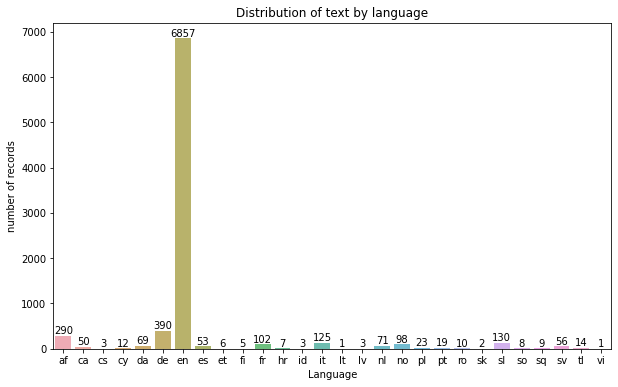

In [ ]:
x = df["Language"].value_counts()
x=x.sort_index()
plt.figure(figsize=(10,6))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Distribution of text by language")
plt.ylabel('number of records')
plt.xlabel('Language')
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show();

In [ ]:
pip install goslate

In [ ]:
from goslate import Goslate

In [ ]:
import goslate

In [ ]:
svc_domains = ['.com','.com.au','.com.ar','.co.kr','.co.in','.co.jp','.at','.de','.ru','.ch','.fr','.es','.ae']
svc_urls = ['http://translate.google' + domain for domain in svc_domains]

In [ ]:
gs = goslate.Goslate()

In [ ]:
dataset.head()

,Short description,Description,Caller,Assignment group,combined_description_caller,combined_description,Language
0,login issue,verified user detailsemployee manager name che...,spxjnwir pjlcoqds,GRP_0,login issue verified user detailsemployee mana...,login issue verified user detailsemployee mana...,en
1,outlook,received from hmjdrvpb.komuaywn@gmail.com\n he...,hmjdrvpb komuaywn,GRP_0,outlook received from hmjdrvpb.komuaywn@gmail....,outlook received from hmjdrvpb.komuaywn@gmail....,en
2,cant log in to vpn,received from eylqgodm.ybqkwiam@gmail.com\n hi...,eylqgodm ybqkwiam,GRP_0,cant log in to vpn received from eylqgodm.ybqk...,cant log in to vpn received from eylqgodm.ybqk...,en
3,unable to access hrtool page,unable to access hrtool page,xbkucsvz gcpydteq,GRP_0,unable to access hrtool page unable to access ...,unable to access hrtool page unable to access ...,it
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error skype error,skype error skype error,no


In [ ]:
datasetByLanguage = dataset.groupby('Language')

In [ ]:
datasetByLanguage_so = datasetByLanguage.get_group('so')

In [ ]:
datasetByLanguage_so.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3 entries, 2086 to 7964
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Short description            3 non-null      object
 1   Description                  3 non-null      object
 2   Caller                       3 non-null      object
 3   Assignment group             3 non-null      object
 4   combined_description_caller  3 non-null      object
 5   combined_description         3 non-null      object
 6   Language                     3 non-null      object
dtypes: object(7)
memory usage: 192.0+ bytes


In [ ]:
#df_withCleanData['ConvertedToEnglish'] = df_withCleanData['combined_description']

In [ ]:
def fn_convertToEnglish(df,columnName):
  for index, rows in df.iterrows:
    df['FinalTranslation'][index] = gs.translate(df[columnName][index],'en','so')

In [ ]:
def fn_converToEng(text):
  text = gs.translate(text,'en','auto')

In [ ]:
datasetByLanguage_so['combined_description'] = datasetByLanguage_so['combined_description'].apply(fn_converToEng)

HTTPError: ignored

In [ ]:
pip install -U deep_translator

     |████████████████████████████████| 97 kB 7.7 MB/s 
     |████████████████████████████████| 97 kB 8.6 MB/s 
  Attempting uninstall: click
    Found existing installation: click 7.1.2
    Uninstalling click-7.1.2:
      Successfully uninstalled click-7.1.2
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires click<8.0,>=5.1, but you have click 8.0.3 which is incompatible.


In [ ]:
from deep_translator import GoogleTranslator

In [ ]:
def fn_convertToEnglish_deepTrans(df,columnName):
  for index in range(len(df)):
    if not df['Language'][index] == "en":
      #gs.translate(df[columnName][index],'en',source_language='auto')
      translated = GoogleTranslator(source='auto',target='en').translate(text=df[columnName][index])
      df[columnName][index]=translated

In [ ]:
fn_convertToEnglish_deepTrans(df_withCleanData,'ConvertedToEnglish')

NotValidPayload: ignored

In [ ]:
df_withCleanData['combined_description'] = df_withCleanData.apply(lambda x: x['com'])

In [ ]:
def fn_translate(df,lang):
  try:
    if lang == 'en':
        return df
    else:
        return translator.translate(df).text
  except:
    return df
    
    
df['English_Description'] = df.apply(lambda x: fn_translate(x['combined_description'], x['Language']), axis=1)

In [ ]:
df.head()

,combined_description,Language,English_Description
0,login issue -verified user details.(employee# ...,en,login issue -verified user details.(employee# ...
1,outlook _x000D_\n_x000D_\nreceived from: hmjdr...,en,outlook _x000D_\n_x000D_\nreceived from: hmjdr...
2,cant log in to vpn _x000D_\n_x000D_\nreceived ...,en,cant log in to vpn _x000D_\n_x000D_\nreceived ...
3,unable to access hr_tool page unable to access...,en,unable to access hr_tool page unable to access...
4,skype error skype error,no,skype error skype error


In [ ]:
df.shape

(8417, 3)

In [ ]:
df_copy['English_Description'] = df['English_Description']

In [ ]:
df_copy.head()

,Unnamed: 0,Short description,Description,Caller,Assignment group,combined_description,combined_description_caller,English_Description
0,0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,login issue -verified user details.(employee# ...,login issue -verified user details.(employee# ...,login issue -verified user details.(employee# ...
1,1,outlook,_x000D_\n_x000D_\nreceived from: hmjdrvpb.komu...,hmjdrvpb komuaywn,GRP_0,outlook _x000D_\n_x000D_\nreceived from: hmjdr...,outlook _x000D_\n_x000D_\nreceived from: hmjdr...,outlook _x000D_\n_x000D_\nreceived from: hmjdr...
2,2,cant log in to vpn,_x000D_\n_x000D_\nreceived from: eylqgodm.ybqk...,eylqgodm ybqkwiam,GRP_0,cant log in to vpn _x000D_\n_x000D_\nreceived ...,cant log in to vpn _x000D_\n_x000D_\nreceived ...,cant log in to vpn _x000D_\n_x000D_\nreceived ...
3,3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr_tool page unable to access...,unable to access hr_tool page unable to access...,unable to access hr_tool page unable to access...
4,4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error skype error,skype error skype error owlgqjme qhcozdfx,skype error skype error


In [ ]:
df_copy['Language'] = df['Language']

In [ ]:
df_copy.head()

,Unnamed: 0,Short description,Description,Caller,Assignment group,combined_description,combined_description_caller,English_Description,Language
0,0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,login issue -verified user details.(employee# ...,login issue -verified user details.(employee# ...,login issue -verified user details.(employee# ...,en
1,1,outlook,_x000D_\n_x000D_\nreceived from: hmjdrvpb.komu...,hmjdrvpb komuaywn,GRP_0,outlook _x000D_\n_x000D_\nreceived from: hmjdr...,outlook _x000D_\n_x000D_\nreceived from: hmjdr...,outlook _x000D_\n_x000D_\nreceived from: hmjdr...,en
2,2,cant log in to vpn,_x000D_\n_x000D_\nreceived from: eylqgodm.ybqk...,eylqgodm ybqkwiam,GRP_0,cant log in to vpn _x000D_\n_x000D_\nreceived ...,cant log in to vpn _x000D_\n_x000D_\nreceived ...,cant log in to vpn _x000D_\n_x000D_\nreceived ...,en
3,3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr_tool page unable to access...,unable to access hr_tool page unable to access...,unable to access hr_tool page unable to access...,en
4,4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error skype error,skype error skype error owlgqjme qhcozdfx,skype error skype error,no


In [ ]:
df_copy.to_csv("dataset1_combined_translatedToEnglish")